### Imports

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# Altair
import altair as alt
alt.renderers.enable('notebook')

### Removes warnings that occassionally show up
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
DATA_PATH = "../../data/Forest-Cover/"

train = pd.read_csv(DATA_PATH + "train.csv")
test  = pd.read_csv(DATA_PATH + "test.csv")

cat_columns = [col for col in train.columns if train[col].dtype == object]
print("Categorical columns:")
print(" --- ".join(cat_columns))

### Numerical columns
num_columns = [col for col in train.columns if train[col].dtype != object]
print("Numerical columns:")
print(" --- ".join(num_columns))
print()
print("Shape of train:", train.shape)
print("Shape of test:",  test.shape)

Categorical columns:

Numerical columns:
Id --- Elevation --- Aspect --- Slope --- Horizontal_Distance_To_Hydrology --- Vertical_Distance_To_Hydrology --- Horizontal_Distance_To_Roadways --- Hillshade_9am --- Hillshade_Noon --- Hillshade_3pm --- Horizontal_Distance_To_Fire_Points --- Wilderness_Area1 --- Wilderness_Area2 --- Wilderness_Area3 --- Wilderness_Area4 --- Soil_Type1 --- Soil_Type2 --- Soil_Type3 --- Soil_Type4 --- Soil_Type5 --- Soil_Type6 --- Soil_Type7 --- Soil_Type8 --- Soil_Type9 --- Soil_Type10 --- Soil_Type11 --- Soil_Type12 --- Soil_Type13 --- Soil_Type14 --- Soil_Type15 --- Soil_Type16 --- Soil_Type17 --- Soil_Type18 --- Soil_Type19 --- Soil_Type20 --- Soil_Type21 --- Soil_Type22 --- Soil_Type23 --- Soil_Type24 --- Soil_Type25 --- Soil_Type26 --- Soil_Type27 --- Soil_Type28 --- Soil_Type29 --- Soil_Type30 --- Soil_Type31 --- Soil_Type32 --- Soil_Type33 --- Soil_Type34 --- Soil_Type35 --- Soil_Type36 --- Soil_Type37 --- Soil_Type38 --- Soil_Type39 --- Soil_Type40 --- 

### Split into id, target, and predictors

In [9]:
train_y = train["Cover_Type"]
train_id = train["Id"]
train_x = train.drop(["Cover_Type", "Id"], axis=1)

test_id = test["Id"]
test_x  = test.drop("Id", axis=1)

full    = pd.concat([train_x, test_x])
train_N = len(train_x)

### Train/Test size difference

In [7]:
temp = pd.DataFrame({"Dataset": ["Train", "Test"], "Number of Records": [train.shape[0], test.shape[0]]})

trace = go.Pie(labels=temp["Dataset"], values=temp["Number of Records"],
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(line=dict(color="black", width=2)))

layout = go.Layout(
    title = "Train/Test size difference",
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig);

### Target: Cover_Type

Nice, seems very boring

In [13]:
vc = train_y.value_counts()

trace = go.Bar(
    x=vc.index,
    y=vc.values,
)

layout = go.Layout(
    title   = "Cover Type shown in Train",
    yaxis   = dict(title = "Count")
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig);

### Correlation Plot

In [42]:
ignore_feats = [col for col in full.columns if "Soil_Type" in col]
corr         = full.drop(ignore_feats, axis=1).corr().round(3)

trace = go.Heatmap(
    x = corr.columns,
    y = corr.index,
    z = corr.values,
)

buttons = []

layout = dict(title = 'Correlation plots')

fig = dict(data=[trace], layout=layout)
iplot(fig)

### Elevation

In [37]:
bins = np.histogram(full["Elevation"], bins=100)

trace = go.Bar(
    x=bins[0],
    y=bins[1],
    orientation="h",
)

layout = go.Layout(
    title   = "Elevation Histogram",
    xaxis   = dict(title = "Count"),
    yaxis   = dict(title = "Elevation")
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig);

### Distance to Hydrology

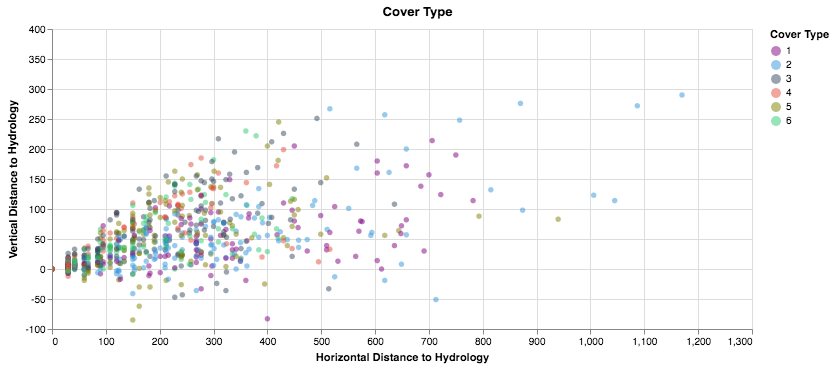

In [57]:
temp = train[["Cover_Type", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology"]].sample(1000)
temp["Cover_Type"] = temp["Cover_Type"].map(str)
temp.columns = ["Cover Type", "Horizontal Distance to Hydrology", "Vertical Distance to Hydrology"]

click = alt.selection_multi(fields=['Cover Type'])
palette = alt.Scale(domain=["1", "2", "3", "4", "5", "6"],
                    range=["purple", "#3498db", "#34495e", "#e74c3c", "olive", "#2ecc71"])


(alt.Chart(temp)
 .mark_circle()
 .encode(
     x='Horizontal Distance to Hydrology',
     y='Vertical Distance to Hydrology',
     opacity=alt.value(0.5),
     tooltip=['Cover Type', "Horizontal Distance to Hydrology", "Vertical Distance to Hydrology"],
     color=alt.condition(click, 'Cover Type',
                         alt.value('lightgray'), scale=palette))
 .properties(selection=click, width=700, title="Cover Type")
 .interactive())